<a href="https://colab.research.google.com/github/milosavljeviciva/domaci/blob/main/diabetesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

data = pd.read_csv("/content/diabetes_risk_prediction_dataset.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


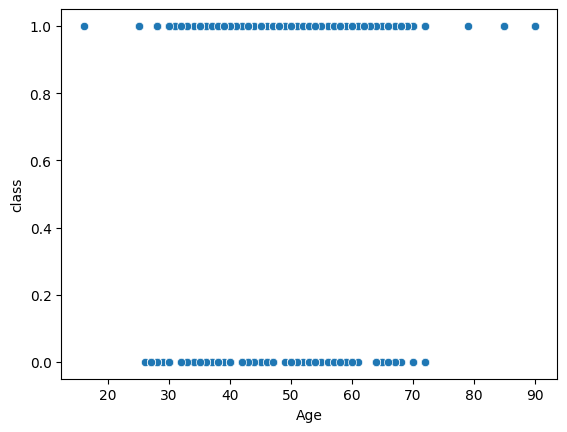

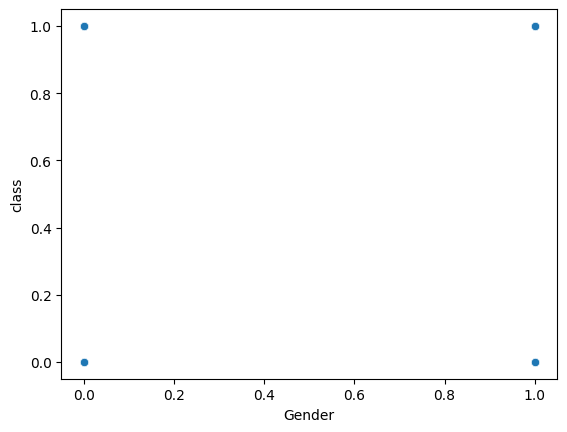

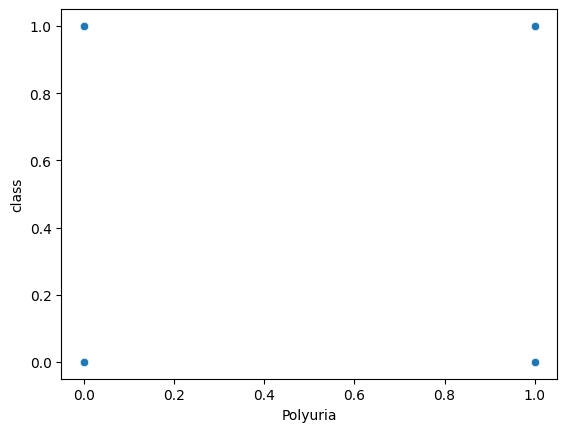

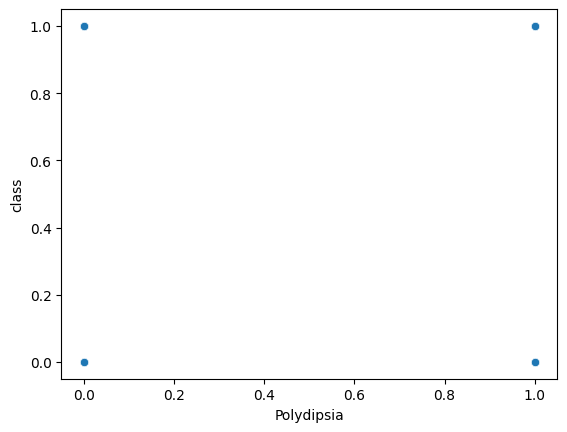

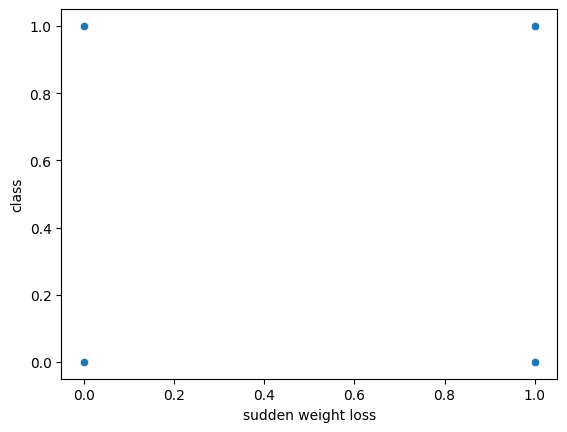

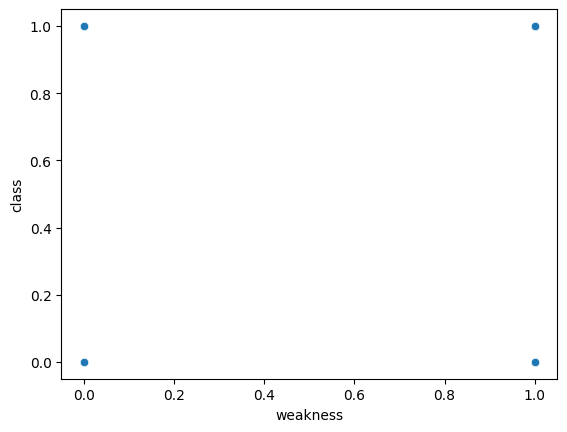

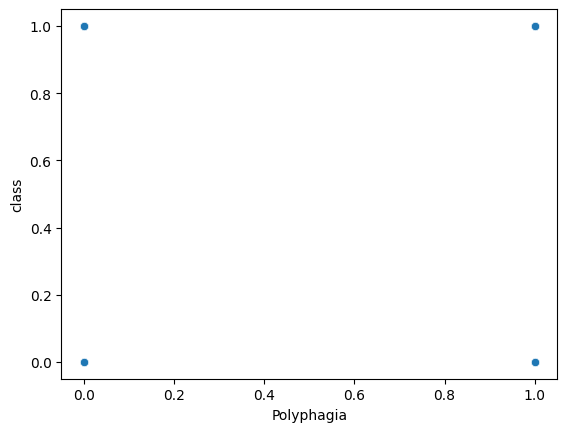

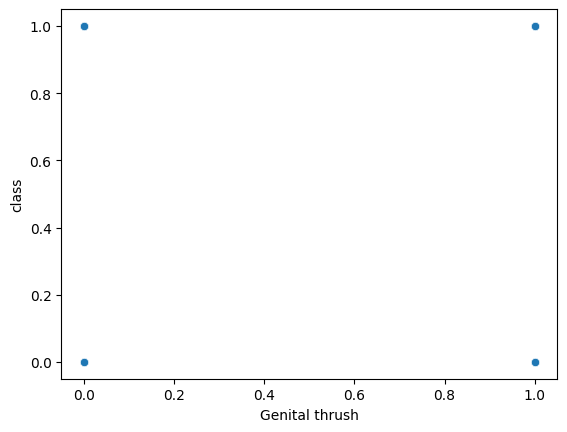

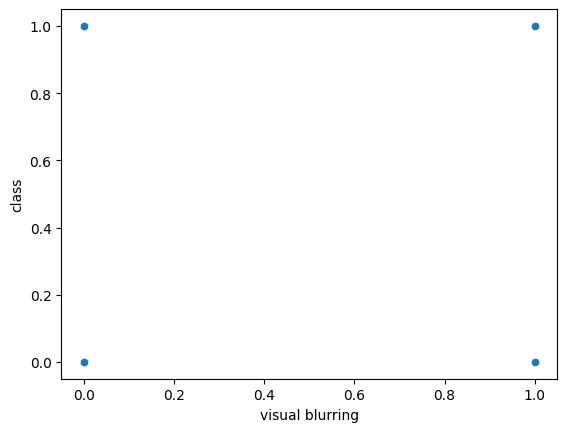

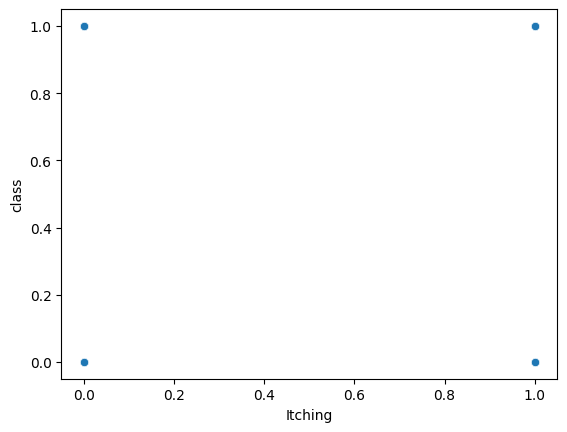

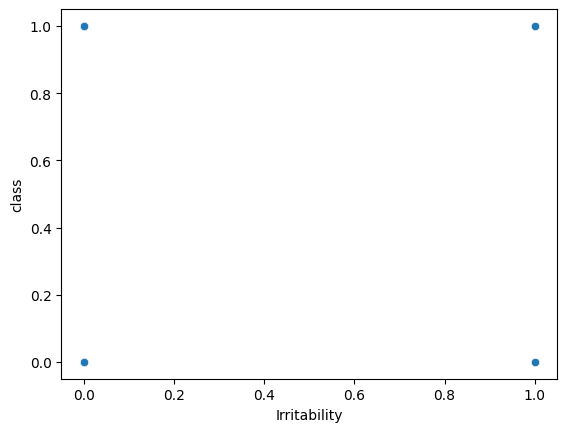

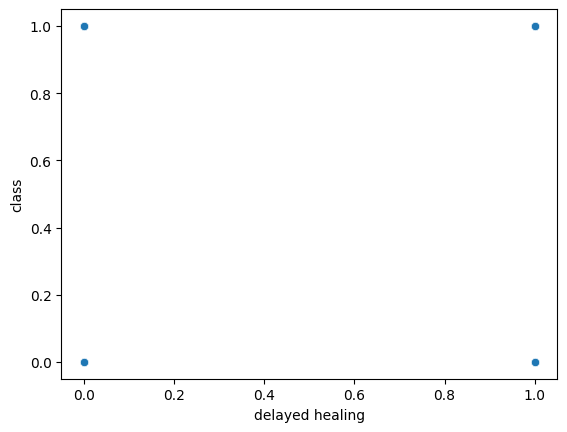

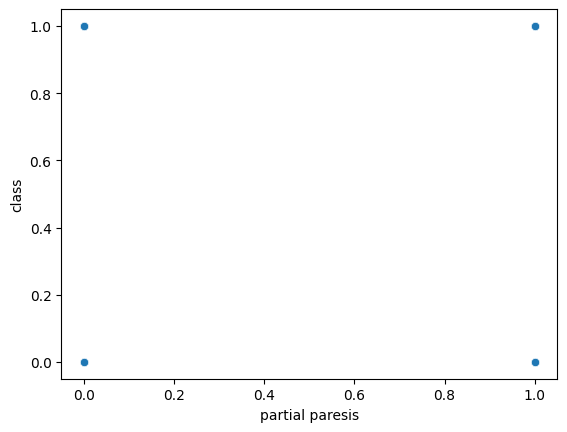

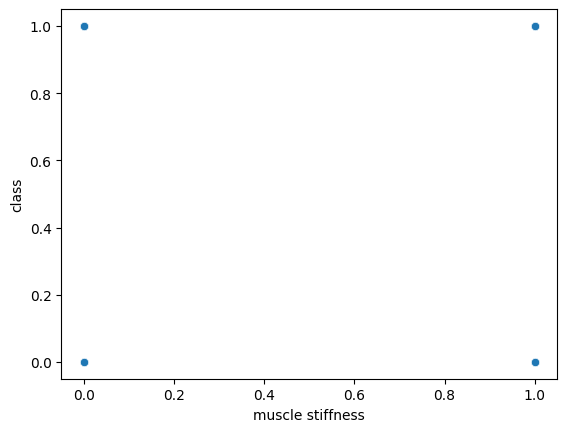

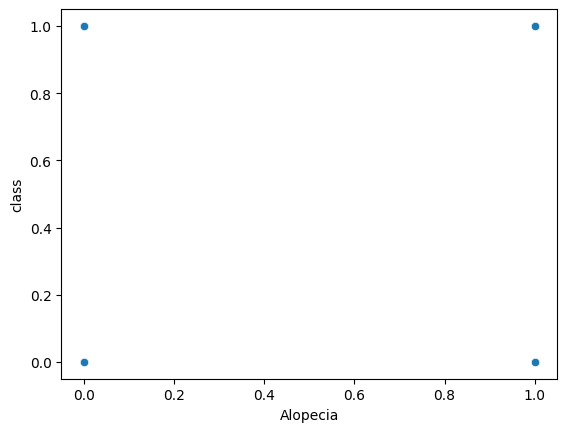

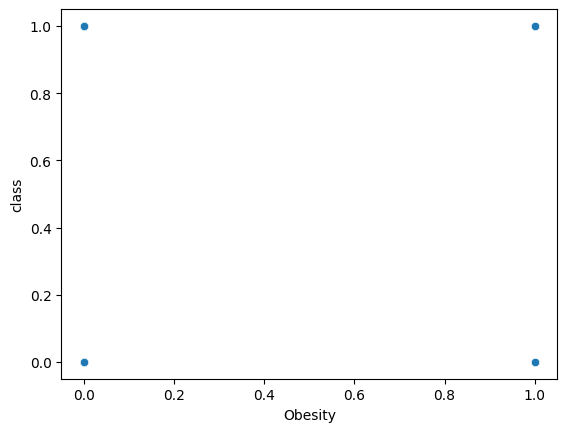

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

#zavisnost postojanja dijabetesa od godina ispitanika
sns.scatterplot(data, x=data['Age'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od pola ispitanika
sns.scatterplot(data, x=data['Gender'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od poliurije
sns.scatterplot(data, x=data['Polyuria'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od polidipsije
sns.scatterplot(data, x=data['Polydipsia'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od naglog gubitka tezine
sns.scatterplot(data, x=data['sudden weight loss'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od slabosti
sns.scatterplot(data, x=data['weakness'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od polifagije
sns.scatterplot(data, x=data['Polyphagia'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od polidipsije
sns.scatterplot(data, x=data['Genital thrush'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od polidipsije
sns.scatterplot(data, x=data['visual blurring'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od svraba
sns.scatterplot(data, x=data['Itching'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od iritacije
sns.scatterplot(data, x=data['Irritability'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od polidipsije
sns.scatterplot(data, x=data['delayed healing'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od polidipsije
sns.scatterplot(data, x=data['partial paresis'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od ukocenosti misica
sns.scatterplot(data, x=data['muscle stiffness'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od alopecije
sns.scatterplot(data, x=data['Alopecia'], y=data['class'])
plt.show()
#zavisnost postojanja dijabetesa od prejedanja
sns.scatterplot(data, x=data['Obesity'], y=data['class'])
plt.show()

In [33]:
data = data.replace('Male', 1)
data = data.replace('Female', 0)
data = data.replace('Yes', 1)
data = data.replace('No', 0)
data = data.replace('Positive', 1)
data = data.replace('Negative', 0)


cor = data.corr().iloc[-1].sort_values(ascending=True)
#cor = data.sort_values(["class", "Polyuria"])
#sns.heatmap(cor, annot=True, cmap="vlag",center=0)
display(cor)


Gender               -0.449233
Alopecia             -0.267512
Itching              -0.013384
delayed healing       0.046980
Obesity               0.072173
Age                   0.108679
Genital thrush        0.110288
muscle stiffness      0.122474
weakness              0.243275
visual blurring       0.251300
Irritability          0.299467
Polyphagia            0.342504
partial paresis       0.432288
sudden weight loss    0.436568
Polydipsia            0.648734
Polyuria              0.665922
class                 1.000000
Name: class, dtype: float64

In [38]:
row, col = data.shape
print("Broj redova: ", row)
print("Broj kolona: ", col)

Broj redova:  520
Broj kolona:  17


In [41]:
#logisticka regresija
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

print("Trening: ", len(train))
print("Test: ", len(test))

Trening:  416
Test:  104


In [58]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(train[['Age']], train['class'])

LogisticRegression()

In [59]:
from sklearn.metrics import classification_report

y_pred = clf.predict(test[['Age']])
y_true = test['class']

print(classification_report(y_true, y_pred, target_names = ["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        43
    Negative       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
